<h1>Install Required Libraries
<h5>yfinance: Fetches historical stock data.<br>
pandas: Handles data manipulation.<br>
numpy: Performs numerical computations.<br>
matplotlib & seaborn: Creates plots.<br>
scipy & scikit-learn: Performs statistical analysis.</h5>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.preprocessing import MinMaxScaler
print("yfinance installed successfully!")


<h3>Download Data for Multiple Stocks</h3>

In [8]:
# List of stock symbols for multiple companies
stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NFLX"]

# Download historical stock data (from 2020 to 2025)
data = yf.download(stocks, start="2020-01-01", end="2025-01-01")

# Display first few rows
print(data.head())

# Save to CSV file for future use
data.to_csv("multiple_stock_data.csv")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  6 of 6 completed

Price           Close                                                \
Ticker           AAPL       AMZN      GOOGL        MSFT        NFLX   
Date                                                                  
2020-01-02  72.716080  94.900497  68.186813  153.630676  329.809998   
2020-01-03  72.009132  93.748497  67.830109  151.717728  325.899994   
2020-01-06  72.582916  95.143997  69.638054  152.109848  335.829987   
2020-01-07  72.241554  95.343002  69.503548  150.723007  330.750000   
2020-01-08  73.403656  94.598503  69.998253  153.123764  339.260010   

Price                       High                                    ...  \
Ticker           TSLA       AAPL       AMZN      GOOGL        MSFT  ...   
Date                                                                ...   
2020-01-02  28.684000  72.776606  94.900497  68.186813  153.735890  ...   
2020-01-03  29.534000  72.771760  94.309998  68.439404  152.989855  ...   
2020-01-06  30.102667  72.621654  95.184502  69.663459  

<h3>Check for Missing Values</h3>

In [14]:
# Check for missing values
print(data.isnull().sum())




Price   Ticker
Close   AAPL      0
        AMZN      0
        GOOGL     0
        MSFT      0
        NFLX      0
        TSLA      0
High    AAPL      0
        AMZN      0
        GOOGL     0
        MSFT      0
        NFLX      0
        TSLA      0
Low     AAPL      0
        AMZN      0
        GOOGL     0
        MSFT      0
        NFLX      0
        TSLA      0
Open    AAPL      0
        AMZN      0
        GOOGL     0
        MSFT      0
        NFLX      0
        TSLA      0
Volume  AAPL      0
        AMZN      0
        GOOGL     0
        MSFT      0
        NFLX      0
        TSLA      0
dtype: int64


<h3>Convert Date Format

In [36]:
# Fill missing values using forward fill
data.ffill(inplace=True)

In [37]:
# Convert index to datetime
data.index = pd.to_datetime(data.index)

<h3>Calculate Daily Returns</h3>

In [38]:
# Compute daily returns
returns = data.pct_change().dropna()

In [39]:
# Display first few rows
print(returns.head())

            Close_AAPL  Close_AMZN  Close_GOOGL  Close_MSFT  Close_NFLX  \
Date                                                                      
2020-01-03   -0.009722   -0.012139    -0.005231   -0.012452   -0.011855   
2020-01-06    0.007968    0.014886     0.026654    0.002585    0.030469   
2020-01-07   -0.004703    0.002092    -0.001932   -0.009117   -0.015127   
2020-01-08    0.016086   -0.007809     0.007118    0.015928    0.025729   
2020-01-09    0.021241    0.004799     0.010498    0.012493   -0.010611   

            Close_TSLA  High_AAPL  High_AMZN  High_GOOGL  High_MSFT  ...  \
Date                                                                 ...   
2020-01-03    0.029633  -0.000067  -0.006222    0.003704  -0.004853  ...   
2020-01-06    0.019255  -0.002063   0.009273    0.017885  -0.005314  ...   
2020-01-07    0.038801   0.003134   0.005358    0.003705   0.003583  ...   
2020-01-08    0.049205   0.011765  -0.001510    0.005949   0.007077  ...   
2020-01-09   -0.02

In [41]:
print(data.columns)


Index(['Close_AAPL', 'Close_AMZN', 'Close_GOOGL', 'Close_MSFT', 'Close_NFLX',
       'Close_TSLA', 'High_AAPL', 'High_AMZN', 'High_GOOGL', 'High_MSFT',
       'High_NFLX', 'High_TSLA', 'Low_AAPL', 'Low_AMZN', 'Low_GOOGL',
       'Low_MSFT', 'Low_NFLX', 'Low_TSLA', 'Open_AAPL', 'Open_AMZN',
       'Open_GOOGL', 'Open_MSFT', 'Open_NFLX', 'Open_TSLA', 'Volume_AAPL',
       'Volume_AMZN', 'Volume_GOOGL', 'Volume_MSFT', 'Volume_NFLX',
       'Volume_TSLA'],
      dtype='object')


<h1>Exploratory Data Analysis (EDA)</h1>

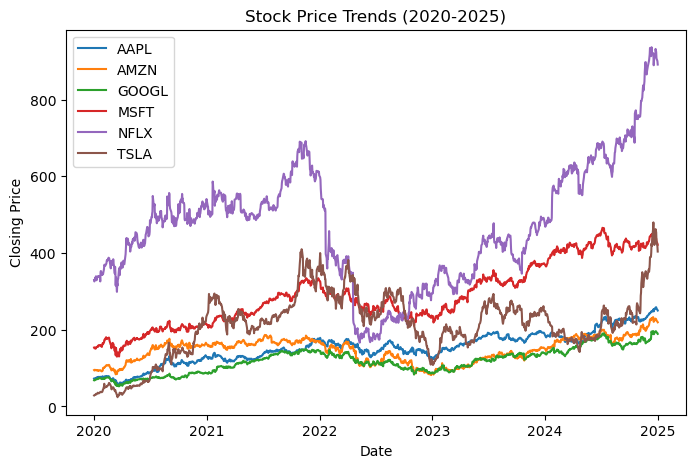

In [83]:
import matplotlib.pyplot as plt

# Filter only the "Close" columns
close_prices = data[[col for col in data.columns if "Close" in col]]

plt.figure(figsize=(8,5))

# Plot each stock's closing price
for stock in close_prices.columns:
    plt.plot(data.index, close_prices[stock], label=stock.replace("Close_", ""))

plt.title("Stock Price Trends (2020-2025)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()


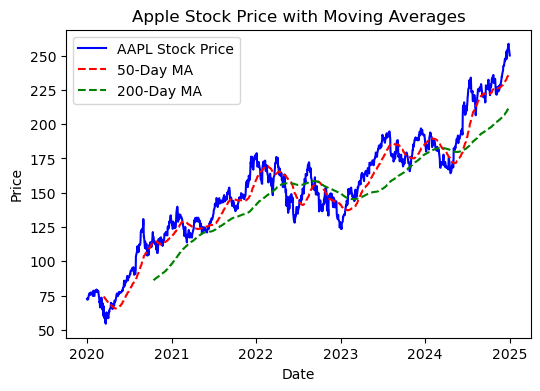

In [84]:
import matplotlib.pyplot as plt

# Compute 50-day & 200-day moving averages for AAPL
data["AAPL_50MA"] = data["Close_AAPL"].rolling(window=50).mean()
data["AAPL_200MA"] = data["Close_AAPL"].rolling(window=200).mean()

# Plot Apple Stock with Moving Averages
plt.figure(figsize=(6, 4))
plt.plot(data.index, data["Close_AAPL"], label="AAPL Stock Price", color="blue")
plt.plot(data.index, data["AAPL_50MA"], label="50-Day MA", linestyle="--", color="red")
plt.plot(data.index, data["AAPL_200MA"], label="200-Day MA", linestyle="--", color="green")

plt.title("Apple Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


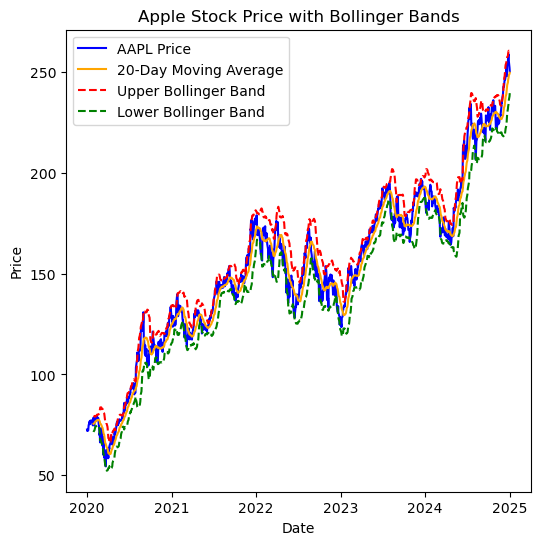

In [85]:
import matplotlib.pyplot as plt

# Compute 20-day moving average & standard deviation for AAPL
data["AAPL_MA20"] = data["Close_AAPL"].rolling(window=20).mean()
data["AAPL_STD20"] = data["Close_AAPL"].rolling(window=20).std()

# Compute Upper & Lower Bollinger Bands
data["AAPL_UpperBB"] = data["AAPL_MA20"] + (2 * data["AAPL_STD20"])
data["AAPL_LowerBB"] = data["AAPL_MA20"] - (2 * data["AAPL_STD20"])

# Plot Bollinger Bands
plt.figure(figsize=(6,6))
plt.plot(data.index, data["Close_AAPL"], label="AAPL Price", color="blue")
plt.plot(data.index, data["AAPL_MA20"], label="20-Day Moving Average", linestyle="-", color="orange")
plt.plot(data.index, data["AAPL_UpperBB"], label="Upper Bollinger Band", linestyle="--", color="red")
plt.plot(data.index, data["AAPL_LowerBB"], label="Lower Bollinger Band", linestyle="--", color="green")

plt.title("Apple Stock Price with Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


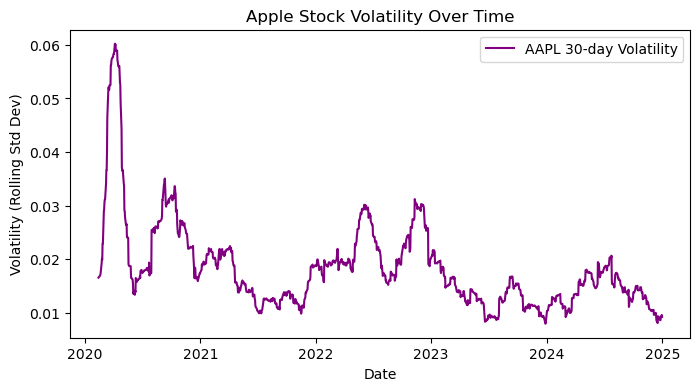

In [88]:
import matplotlib.pyplot as plt

# Compute daily returns for AAPL
returns = data["Close_AAPL"].pct_change()

# Compute 30-day rolling standard deviation (volatility) for AAPL
data["AAPL_volatility"] = returns.rolling(window=30).std()

# Plot Volatility
plt.figure(figsize=(8,4))
plt.plot(data.index, data["AAPL_volatility"], label="AAPL 30-day Volatility", color="purple")

plt.title("Apple Stock Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility (Rolling Std Dev)")
plt.legend()
plt.show()


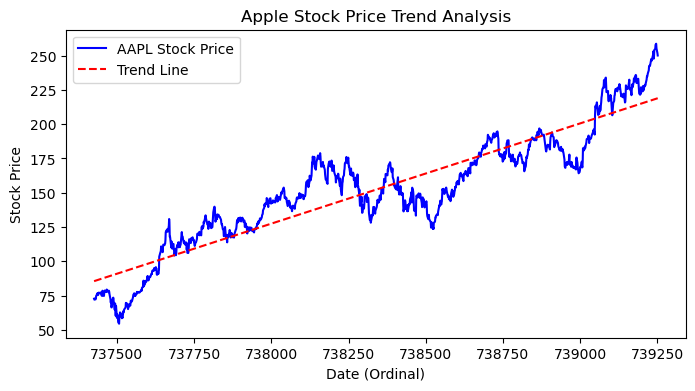

In [89]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Select AAPL data and reset index
aapl_data = data[["Close_AAPL"]].reset_index()

# Convert date to ordinal format
aapl_data["Date"] = aapl_data["Date"].map(lambda x: x.toordinal())

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(aapl_data["Date"], aapl_data["Close_AAPL"])

# Generate trend line
trend_line = intercept + slope * aapl_data["Date"]

# Plot Stock Prices with Trend Line
plt.figure(figsize=(8,4))
plt.plot(aapl_data["Date"], aapl_data["Close_AAPL"], label="AAPL Stock Price", color="blue")
plt.plot(aapl_data["Date"], trend_line, label="Trend Line", linestyle="--", color="red")

plt.title("Apple Stock Price Trend Analysis")
plt.xlabel("Date (Ordinal)")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


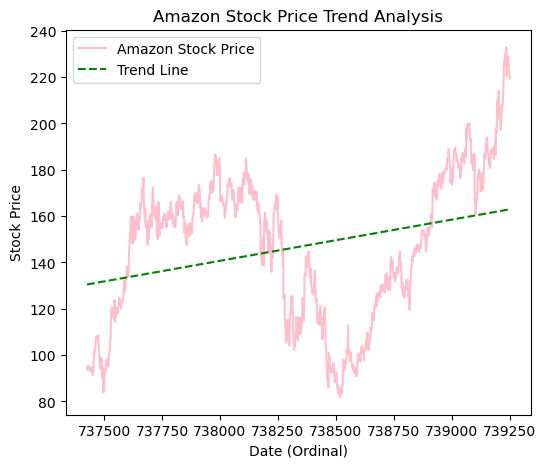

In [90]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Select AAPL data and reset index
aapl_data = data[["Close_AMZN"]].reset_index()

# Convert date to ordinal format
aapl_data["Date"] = aapl_data["Date"].map(lambda x: x.toordinal())

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(aapl_data["Date"], aapl_data["Close_AMZN"])

# Generate trend line
trend_line = intercept + slope * aapl_data["Date"]

# Plot Stock Prices with Trend Line
plt.figure(figsize=(6,5))
plt.plot(aapl_data["Date"], aapl_data["Close_AMZN"], label="Amazon Stock Price", color="pink")
plt.plot(aapl_data["Date"], trend_line, label="Trend Line", linestyle="--", color="green")

plt.title("Amazon Stock Price Trend Analysis")
plt.xlabel("Date (Ordinal)")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

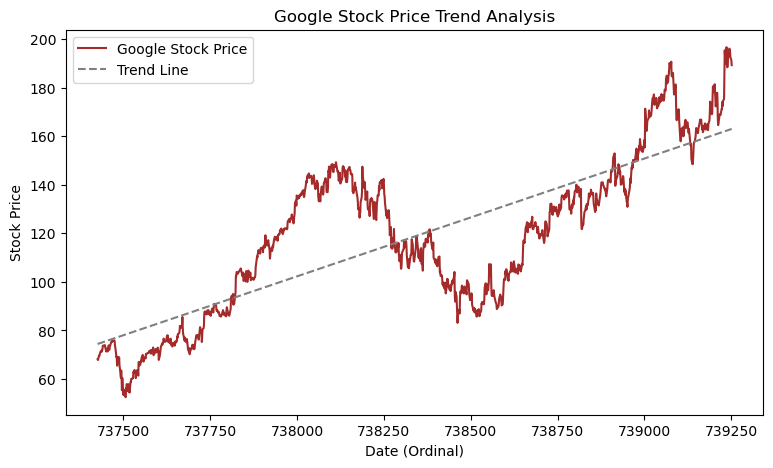

In [70]:
# Select AAPL data and reset index
aapl_data = data[["Close_GOOGL"]].reset_index()

# Convert date to ordinal format
aapl_data["Date"] = aapl_data["Date"].map(lambda x: x.toordinal())

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(aapl_data["Date"], aapl_data["Close_GOOGL"])

# Generate trend line
trend_line = intercept + slope * aapl_data["Date"]

# Plot Stock Prices with Trend Line
plt.figure(figsize=(9,5))
plt.plot(aapl_data["Date"], aapl_data["Close_GOOGL"], label="Google Stock Price", color="brown")
plt.plot(aapl_data["Date"], trend_line, label="Trend Line", linestyle="--", color="grey")

plt.title("Google Stock Price Trend Analysis")
plt.xlabel("Date (Ordinal)")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

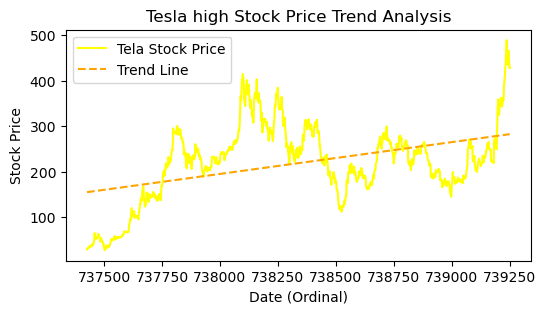

In [91]:
# Select AAPL data and reset index
aapl_data = data[["High_TSLA"]].reset_index()

# Convert date to ordinal format
aapl_data["Date"] = aapl_data["Date"].map(lambda x: x.toordinal())

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(aapl_data["Date"], aapl_data["High_TSLA"])

# Generate trend line
trend_line = intercept + slope * aapl_data["Date"]

# Plot Stock Prices with Trend Line
plt.figure(figsize=(6,3))
plt.plot(aapl_data["Date"], aapl_data["High_TSLA"], label="Tela Stock Price", color="yellow")
plt.plot(aapl_data["Date"], trend_line, label="Trend Line", linestyle="--", color="orange")

plt.title("Tesla high Stock Price Trend Analysis")
plt.xlabel("Date (Ordinal)")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

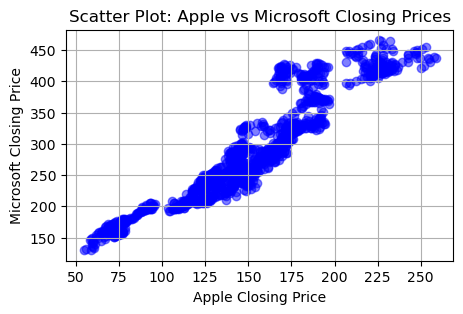

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.scatter(data["Close_AAPL"], data["Close_MSFT"], color='blue', alpha=0.5)

plt.title("Scatter Plot: Apple vs Microsoft Closing Prices")
plt.xlabel("Apple Closing Price")
plt.ylabel("Microsoft Closing Price")
plt.grid(True)
plt.show()


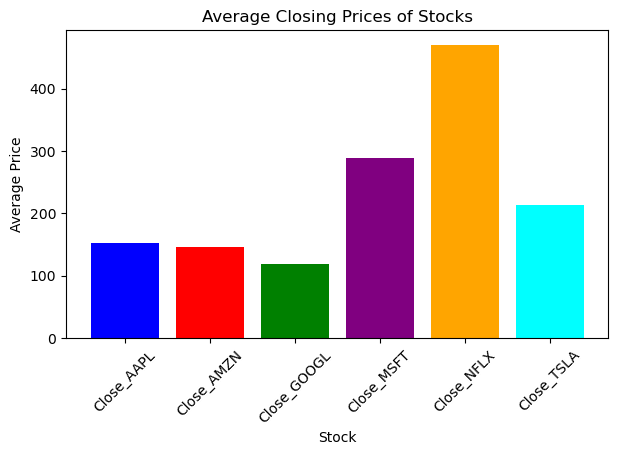

In [73]:
import numpy as np

# Compute average closing prices
avg_closing_prices = data[["Close_AAPL", "Close_AMZN", "Close_GOOGL", "Close_MSFT", "Close_NFLX", "Close_TSLA"]].mean()

plt.figure(figsize=(7,4))
plt.bar(avg_closing_prices.index, avg_closing_prices.values, color=['blue', 'red', 'green', 'purple', 'orange', 'cyan'])

plt.title("Average Closing Prices of Stocks")
plt.xlabel("Stock")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


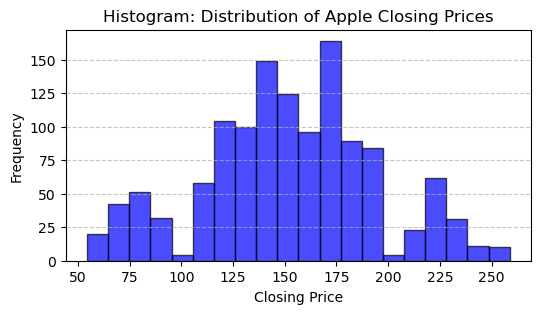

In [74]:
plt.figure(figsize=(6,3))
plt.hist(data["Close_AAPL"], bins=20, color='blue', alpha=0.7, edgecolor='black')

plt.title("Histogram: Distribution of Apple Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


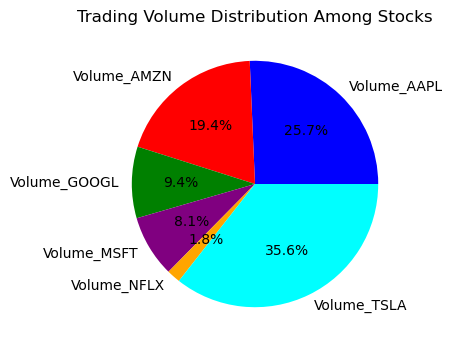

In [75]:
# Compute average trading volumes
avg_volumes = data[["Volume_AAPL", "Volume_AMZN", "Volume_GOOGL", "Volume_MSFT", "Volume_NFLX", "Volume_TSLA"]].mean()

plt.figure(figsize=(4,4))
plt.pie(avg_volumes, labels=avg_volumes.index, autopct='%1.1f%%', colors=['blue', 'red', 'green', 'purple', 'orange', 'cyan'])

plt.title("Trading Volume Distribution Among Stocks")
plt.show()


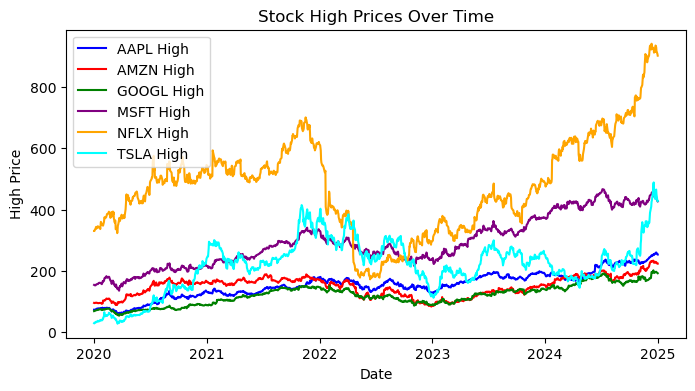

In [77]:
plt.figure(figsize=(8,4))

plt.plot(data.index, data["High_AAPL"], label="AAPL High", color="blue")
plt.plot(data.index, data["High_AMZN"], label="AMZN High", color="red")
plt.plot(data.index, data["High_GOOGL"], label="GOOGL High", color="green")
plt.plot(data.index, data["High_MSFT"], label="MSFT High", color="purple")
plt.plot(data.index, data["High_NFLX"], label="NFLX High", color="orange")
plt.plot(data.index, data["High_TSLA"], label="TSLA High", color="cyan")

plt.title("Stock High Prices Over Time")
plt.xlabel("Date")
plt.ylabel("High Price")
plt.legend()
plt.show()


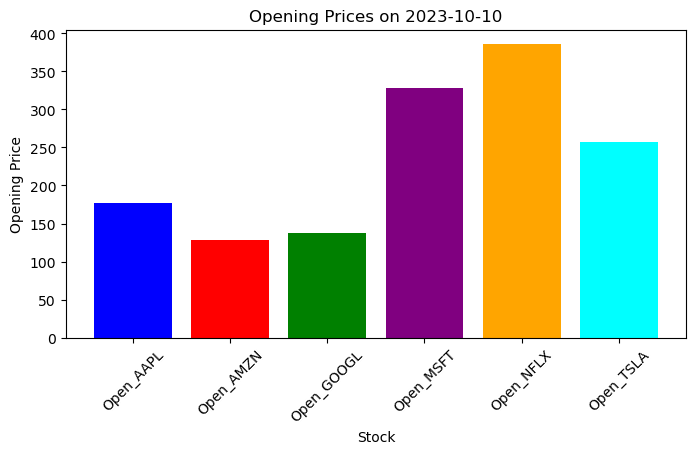

In [78]:

# Ensure the index is in datetime format
data.index = pd.to_datetime(data.index)

# Select a specific date
date_selected = pd.Timestamp("2023-10-10")

# Check if the date exists in the dataset
if date_selected in data.index:
    opening_prices = data.loc[date_selected, ["Open_AAPL", "Open_AMZN", "Open_GOOGL", "Open_MSFT", "Open_NFLX", "Open_TSLA"]]

    plt.figure(figsize=(8,4))
    plt.bar(opening_prices.index, opening_prices.values, color=['blue', 'red', 'green', 'purple', 'orange', 'cyan'])

    plt.title(f"Opening Prices on {date_selected.date()}")
    plt.xlabel("Stock")
    plt.ylabel("Opening Price")
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"Date {date_selected.date()} not found in the dataset.")


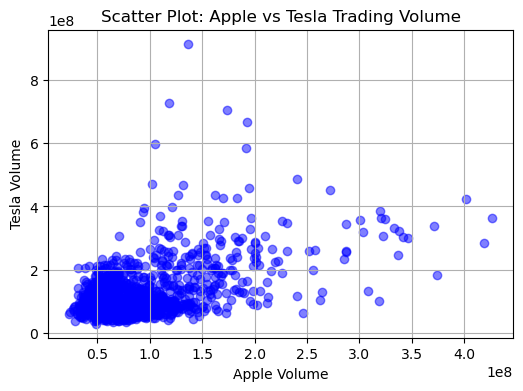

In [80]:
plt.figure(figsize=(6,4))
plt.scatter(data["Volume_AAPL"], data["Volume_TSLA"], color='blue', alpha=0.5)

plt.title("Scatter Plot: Apple vs Tesla Trading Volume")
plt.xlabel("Apple Volume")
plt.ylabel("Tesla Volume")
plt.grid(True)
plt.show()


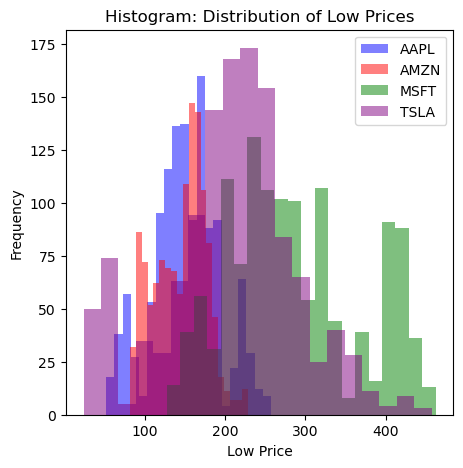

In [81]:
plt.figure(figsize=(5,5))
plt.hist(data["Low_AAPL"], bins=20, alpha=0.5, label="AAPL", color="blue")
plt.hist(data["Low_AMZN"], bins=20, alpha=0.5, label="AMZN", color="red")
plt.hist(data["Low_MSFT"], bins=20, alpha=0.5, label="MSFT", color="green")
plt.hist(data["Low_TSLA"], bins=20, alpha=0.5, label="TSLA", color="purple")

plt.title("Histogram: Distribution of Low Prices")
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()


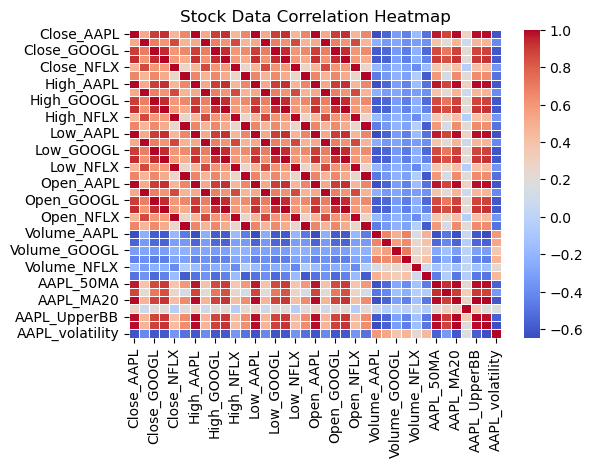

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)

plt.title("Stock Data Correlation Heatmap")
plt.show()
